# Unit 5 - Financial Planning

In [1]:
# Initial imports
import os
import requests
import pandas as pd
from dotenv import load_dotenv
import alpaca_trade_api as tradeapi
from MCForecastTools import MCSimulation

%matplotlib inline

In [2]:
# Load .env enviroment variables
load_dotenv()

True

## Part 1 - Personal Finance Planner

### Collect Crypto Prices Using the `requests` Library

In [3]:
# Set current amount of crypto assets
# YOUR CODE HERE!

portfolio_btc = 1.2
portfolio_eth = 5.3

In [4]:
# Crypto API URLs
btc_url = "https://api.alternative.me/v2/ticker/Bitcoin/?convert=CAD"
eth_url = "https://api.alternative.me/v2/ticker/Ethereum/?convert=CAD"

In [5]:
#response_data = requests.get(btc_url).json
response_data_btc = requests.get(btc_url)
response_data_btc
response_content_btc = response_data_btc.content
response_content_btc
data_btc = response_data_btc.json()
import json
print(json.dumps(data_btc, indent=4))
response_data_eth = requests.get(eth_url)
response_content_eth = response_data_eth.content
data_eth = response_data_eth.json()
import json
print(json.dumps(data_eth, indent=4))

{
    "data": {
        "1": {
            "id": 1,
            "name": "Bitcoin",
            "symbol": "BTC",
            "website_slug": "bitcoin",
            "rank": 1,
            "circulating_supply": 18710856,
            "total_supply": 18710856,
            "max_supply": 21000000,
            "quotes": {
                "USD": {
                    "price": 48140.0,
                    "volume_24h": 60485540747,
                    "market_cap": 901971844072,
                    "percentage_change_1h": -2.10843544866667,
                    "percentage_change_24h": -5.97024972864081,
                    "percentage_change_7d": -16.0759378289853,
                    "percent_change_1h": -2.10843544866667,
                    "percent_change_24h": -5.97024972864081,
                    "percent_change_7d": -16.0759378289853
                },
                "CAD": {
                    "price": 58292.726,
                    "volume_24h": 73241941290.5423,
                    

In [36]:
# Fetch current BTC price
btc_value = data_btc["data"]["1"]["quotes"]["USD"]["price"]
my_btc_value = portfolio_btc * btc_value

# Fetch current ETH price

eth_value = data_eth["data"]["1027"]["quotes"]["USD"]["price"]
my_eth_value = portfolio_eth * eth_value


# Compute current value of my crpto
total_crypto = my_btc_value + my_eth_value

# Print current crypto wallet balance
print(f"The current value of your {portfolio_btc} BTC is ${my_btc_value:0.2f}")
print(f"The current value of your {portfolio_eth} ETH is ${my_eth_value:0.2f}")

The current value of your 1.2 BTC is $57768.00
The current value of your 5.3 ETH is $20050.22


### Collect Investments Data Using Alpaca: `SPY` (stocks) and `AGG` (bonds)

In [23]:
# Set current amount of shares
my_agg = 200
my_spy = 50

In [24]:
# Set Alpaca API key and secret
# YOUR CODE HERE!
alpaca_api_key = os.getenv("ALPACA_API_KEY")
alpaca_secret_key = os.getenv("ALPACA_SECRET_KEY")

# Create the Alpaca API object

In [25]:
# YOUR CODE HERE!
api = tradeapi.REST(alpaca_api_key, alpaca_secret_key, api_version = "v2")

In [26]:
# Format current date as ISO format
# YOUR CODE HERE!
today = pd.Timestamp("05-14-2021", tz="America/New_York").isoformat()
# Set the tickers
tickers = ["AGG", "SPY"]

# Set timeframe to '1D' for Alpaca API
timeframe = "1D"

# Get current closing prices for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
# YOUR CODE HERE!

df_portfolio = api.get_barset(tickers, timeframe, start=today, end=today,).df

# Preview DataFrame
# YOUR CODE HERE!

df_portfolio.head()

AGG                                       SPY  \
                             open    high       low   close   volume   open   
time                                                                          
2021-05-14 00:00:00-04:00  114.22  114.28  114.1219  114.28  3711363  413.2   

                                                             
                             high     low   close    volume  
time                                                         
2021-05-14 00:00:00-04:00  417.49  413.18  416.53  69027661

In [27]:
# Pick AGG and SPY close prices
# YOUR CODE HERE!

agg_close_price = float(df_portfolio["AGG"]["close"])
spy_close_price = float(df_portfolio["SPY"]["close"])

# Print AGG and SPY close prices
print(f"Current AGG closing price: ${agg_close_price}")
print(f"Current SPY closing price: ${spy_close_price}")

Current AGG closing price: $114.28
Current SPY closing price: $416.53


In [35]:
# Compute the current value of shares
# YOUR CODE HERE!

my_agg_value = my_agg * agg_close_price
my_spy_value = my_spy * spy_close_price

# Print current value of shares
print(f"The current value of your {my_spy} SPY shares is ${my_spy_value:0.2f}")
print(f"The current value of your {my_agg} AGG shares is ${my_agg_value:0.2f}")

The current value of your 50 SPY shares is $20826.50
The current value of your 200 AGG shares is $22856.00


### Savings Health Analysis

In [37]:
# Set monthly household income
# YOUR CODE HERE!

monthly_income = 12000
total_crytpo = my_btc_value + my_eth_value
total_shares_value = my_agg_value + my_spy_value
data = {"amount":[total_crypto, total_shares_value]}

# Consolidate financial assets data
# YOUR CODE HERE!

# Create savings DataFrame
# YOUR CODE HERE!

df_savings =pd.DataFrame(data, index=["crypto", "shares"])

# Display savings DataFrame
display(df_savings)

,amount
crypto,77818.218
shares,43682.500


<AxesSubplot:title={'center':'Composition of Personal Savings'}, ylabel='amount'>

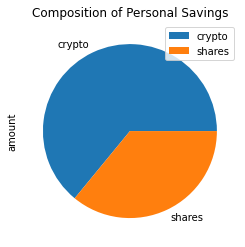

In [38]:
# Plot savings pie chart
# YOUR CODE HERE!

df_savings.plot.pie(y="amount", title="Composition of Personal Savings")

In [40]:
# Set ideal emergency fund
emergency_fund = monthly_income * 3

# Calculate total amount of savings
# YOUR CODE HERE!

total_savings = total_crypto + total_shares_value
# Validate saving health
# YOUR CODE HERE!

if emergency_fund < total_savings: 
    print("Congratulations! You have enough money in your emergency fund!")
elif emergency_fund == total_savings:
    print("Congratulations! You have reached this financial goal!")
else:
    print(f"You are {emergency_fund - total_savings} dollars away from reaching your financial goal!")

Congratulations! You have enough money in your emergency fund!


## Part 2 - Retirement Planning

### Monte Carlo Simulation

In [41]:
# Set start and end dates of five years back from today.
# Sample results may vary from the solution based on the time frame chosen
start_date = pd.Timestamp('2016-05-01', tz='America/New_York').isoformat()
end_date = pd.Timestamp('2021-05-01', tz='America/New_York').isoformat()

In [42]:
# Get 5 years' worth of historical data for SPY and AGG
# (use a limit=1000 parameter to call the most recent 1000 days of data)
# YOUR CODE HERE!

tickers = ["AGG", "SPY"]
df_stock_data = api.get_barset(tickers, timeframe, start=start_date, end=end_date).df

# Display sample data
df_stock_data.head()

AGG                                       \
                             open      high       low   close   volume   
time                                                                     
2020-12-07 00:00:00-05:00  117.76  117.8262  117.6900  117.75  4689469   
2020-12-08 00:00:00-05:00  117.88  117.9597  117.7500  117.77  3587353   
2020-12-09 00:00:00-05:00  117.73  117.7800  117.5172  117.62  4720359   
2020-12-10 00:00:00-05:00  117.74  117.9300  117.6900  117.88  4694024   
2020-12-11 00:00:00-05:00  118.01  118.0900  117.9500  118.03  5537449   

                              SPY                                        
                             open      high     low     close    volume  
time                                                                     
2020-12-07 00:00:00-05:00  369.02  369.6200  367.72  369.1200  40456544  
2020-12-08 00:00:00-05:00  367.72  370.7800  367.67  370.1599  32702217  
2020-12-09 00:00:00-05:00  370.88  371.0500  365.95  366.8900  60700254  
2020-12-10 00:00:00-05:00  365.37  367.8600  364.43  366.7200  47851654  
2020-12-11 00:00:00-05:00  364.90  366.7402  363.26  366.2800  47917103

In [43]:
# Configuring a Monte Carlo simulation to forecast 30 years cumulative returns
# use limit=1000 to call the most recent 1000 days of data
# YOUR CODE HERE!

MC_even_dist = MCSimulation(portfolio_data = df_stock_data, weights = [.40, .60], num_simulation = 500, num_trading_days = 252 * 30)

In [44]:
# Printing the simulation input data
# YOUR CODE HERE!

MC_even_dist.portfolio_data.head()

AGG                                       \
                             open      high       low   close   volume   
time                                                                     
2020-12-07 00:00:00-05:00  117.76  117.8262  117.6900  117.75  4689469   
2020-12-08 00:00:00-05:00  117.88  117.9597  117.7500  117.77  3587353   
2020-12-09 00:00:00-05:00  117.73  117.7800  117.5172  117.62  4720359   
2020-12-10 00:00:00-05:00  117.74  117.9300  117.6900  117.88  4694024   
2020-12-11 00:00:00-05:00  118.01  118.0900  117.9500  118.03  5537449   

                                           SPY                              \
                          daily_return    open      high     low     close   
time                                                                         
2020-12-07 00:00:00-05:00          NaN  369.02  369.6200  367.72  369.1200   
2020-12-08 00:00:00-05:00     0.000170  367.72  370.7800  367.67  370.1599   
2020-12-09 00:00:00-05:00    -0.001274  370.88  371.0500  365.95  366.8900   
2020-12-10 00:00:00-05:00     0.002211  365.37  367.8600  364.43  366.7200   
2020-12-11 00:00:00-05:00     0.001272  364.90  366.7402  363.26  366.2800   

                                                  
                             volume daily_return  
time                                              
2020-12-07 00:00:00-05:00  40456544          NaN  
2020-12-08 00:00:00-05:00  32702217     0.002817  
2020-12-09 00:00:00-05:00  60700254    -0.008834  
2020-12-10 00:00:00-05:00  47851654    -0.000463  
2020-12-11 00:00:00-05:00  47917103    -0.001200

In [45]:
# Running a Monte Carlo simulation to forecast 30 years cumulative returns
# YOUR CODE HERE!

MC_even_dist.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.009681,0.997265,1.000343,0.999728,0.999924,1.001177,1.000970,0.995108,0.994221,0.996678,...,1.007426,0.997005,1.001826,0.993678,0.994261,1.011820,1.000387,1.002121,1.000961,1.004473
2,0.999136,0.995944,0.999151,0.999670,1.002117,0.996225,1.007344,0.992087,0.987375,0.997628,...,1.010663,0.984225,1.001525,0.993292,0.982413,1.017451,1.002082,0.996664,1.005320,1.007561
3,0.996087,0.998564,1.000837,0.999405,1.005164,0.993263,1.006235,1.001991,0.982996,1.003082,...,1.016173,0.983498,0.989677,0.994689,0.981176,1.017387,1.000579,0.989652,1.008185,1.005653
4,0.999945,0.998923,1.004060,0.995270,1.003610,0.991242,1.004833,1.005364,0.980146,0.998287,...,1.013145,0.982133,0.984334,0.994722,0.978218,1.012923,1.005299,0.979775,1.007244,1.003695
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7556,101.707475,222.194033,158.127378,94.315688,334.578694,71.435243,106.443562,132.706376,76.354587,99.594865,...,94.787389,173.420591,212.075076,148.768890,67.433110,102.083226,81.690341,220.778800,218.800226,106.051937
7557,101.731466,223.148559,157.588577,94.101049,335.910468,71.239022,105.708825,132.307233,76.637505,100.194971,...,94.978443,173.274216,213.499371,149.222944,67.368868,101.171964,81.666330,221.118830,220.514809,105.914417
7558,101.253025,223.795905,156.838985,93.789195,334.038093,71.516346,106.269407,131.922730,76.800480,100.072186,...,95.580650,172.787113,214.385651,150.475215,67.619620,101.017712,81.913375,223.029504,219.002704,106.647587
7559,101.979528,224.969985,157.193541,93.431228,335.460936,72.240414,107.010397,132.199801,76.889615,99.528559,...,95.274549,172.274328,214.006475,150.898621,68.126698,101.539754,82.881919,222.385048,218.891484,106.607605


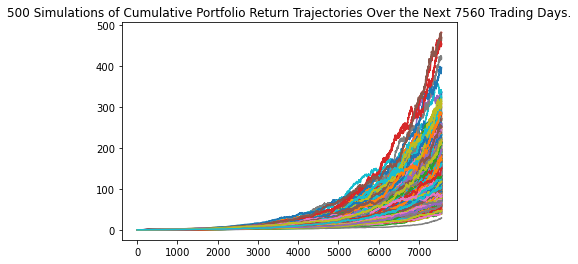

In [46]:
# Plot simulation outcomes
# YOUR CODE HERE!

line_plot = MC_even_dist.plot_simulation()

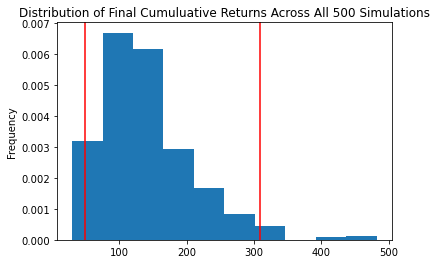

In [47]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

dist_plot = MC_even_dist.plot_distribution()

### Retirement Analysis

In [48]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

even_tbl = MC_even_dist.summarize_cumulative_return()

# Print summary statistics
# YOUR CODE HERE!

print(even_tbl)

count           500.000000
mean            141.130155
std              68.997240
min              30.398939
25%              93.265398
50%             128.457538
75%             171.813931
max             481.893959
95% CI Lower     48.842062
95% CI Upper    308.944335
Name: 7560, dtype: float64


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `$20,000` initial investment.

In [49]:
# Set initial investment
initial_investment = 20000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $20,000
# YOUR CODE HERE!

ci_lower = round(even_tbl[8]*20000,2)
ci_upper = round(even_tbl[9]*20000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $20000 in the portfolio over the next 30 years will end within in the range of $976841.25 and $6178886.71


### Calculate the expected portfolio return at the `95%` lower and upper confidence intervals based on a `50%` increase in the initial investment.

In [50]:
# Set initial investment
initial_investment = 20000 * 1.5

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $30,000
# YOUR CODE HERE!

ci_lower = round(even_tbl[8]*30000,2)
ci_upper = round(even_tbl[9]*30000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 30 years will end within in the range of"
      f" ${ci_lower} and ${ci_upper}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 30 years will end within in the range of $1465261.87 and $9268330.06


## Optional Challenge - Early Retirement


### Five Years Retirement Option

In [52]:
# Configuring a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

MC_even_dist_five = MCSimulation(portfolio_data = df_stock_data, weights = [.40,.60], num_simulation = 500, num_trading_days = 252*5)
MC_even_dist_five.portfolio_data.head()

AGG                                       \
                             open      high       low   close   volume   
time                                                                     
2020-12-07 00:00:00-05:00  117.76  117.8262  117.6900  117.75  4689469   
2020-12-08 00:00:00-05:00  117.88  117.9597  117.7500  117.77  3587353   
2020-12-09 00:00:00-05:00  117.73  117.7800  117.5172  117.62  4720359   
2020-12-10 00:00:00-05:00  117.74  117.9300  117.6900  117.88  4694024   
2020-12-11 00:00:00-05:00  118.01  118.0900  117.9500  118.03  5537449   

                                           SPY                              \
                          daily_return    open      high     low     close   
time                                                                         
2020-12-07 00:00:00-05:00          NaN  369.02  369.6200  367.72  369.1200   
2020-12-08 00:00:00-05:00     0.000170  367.72  370.7800  367.67  370.1599   
2020-12-09 00:00:00-05:00    -0.001274  370.88  371.0500  365.95  366.8900   
2020-12-10 00:00:00-05:00     0.002211  365.37  367.8600  364.43  366.7200   
2020-12-11 00:00:00-05:00     0.001272  364.90  366.7402  363.26  366.2800   

                                                  
                             volume daily_return  
time                                              
2020-12-07 00:00:00-05:00  40456544          NaN  
2020-12-08 00:00:00-05:00  32702217     0.002817  
2020-12-09 00:00:00-05:00  60700254    -0.008834  
2020-12-10 00:00:00-05:00  47851654    -0.000463  
2020-12-11 00:00:00-05:00  47917103    -0.001200

In [53]:
# Running a Monte Carlo simulation to forecast 5 years cumulative returns
# YOUR CODE HERE!

MC_even_dist_five.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,1.008337,0.998439,0.997997,1.013281,1.008683,0.997678,1.000425,1.014195,0.999267,0.999128,...,0.998953,1.005199,1.005798,0.998626,0.998292,1.001223,1.007701,0.994997,1.005243,1.001157
2,1.003617,0.997667,1.014927,1.009895,1.014569,0.999547,1.001524,1.012889,0.996437,0.993572,...,0.998643,1.005415,1.004231,0.998253,0.997495,1.007555,1.007219,0.991804,0.989393,1.003770
3,1.002191,0.996383,1.019197,1.005871,1.010504,0.993999,1.001288,1.007556,1.005903,1.000316,...,0.997481,1.005588,1.009309,0.996895,1.003169,1.002884,1.007667,0.994455,0.994941,1.002990
4,1.003582,0.993467,1.021442,1.010987,1.009247,0.998502,1.009040,1.001008,1.008288,0.989577,...,1.002441,1.004117,1.003496,0.998162,1.000200,1.006535,1.013045,0.991894,0.990434,1.006081
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1256,2.199602,1.743547,2.005946,2.030913,1.880047,2.009790,2.948067,2.554342,2.524263,1.848283,...,2.722350,1.658502,1.588732,2.660966,1.758758,2.378930,2.230265,1.495085,1.856754,2.227181
1257,2.213534,1.760586,2.030506,2.021808,1.873023,1.996091,2.945801,2.555214,2.527000,1.853593,...,2.737084,1.665863,1.596455,2.629062,1.758823,2.391604,2.233590,1.502075,1.859288,2.230098
1258,2.216127,1.756714,2.029760,2.027279,1.883550,2.005789,2.981262,2.588293,2.525988,1.846241,...,2.725778,1.673490,1.594873,2.638679,1.756744,2.399477,2.253475,1.508184,1.863684,2.243372
1259,2.215446,1.767535,2.055195,2.018816,1.878437,2.009361,2.979374,2.614225,2.530717,1.837146,...,2.727335,1.681877,1.594150,2.663590,1.739331,2.415687,2.267731,1.518981,1.853437,2.221498


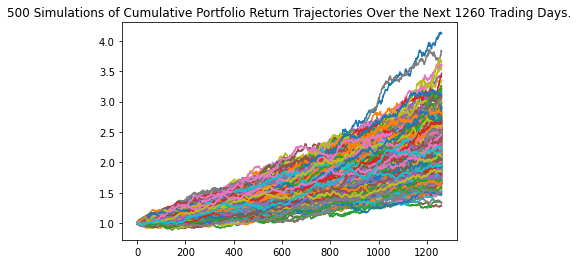

In [54]:
# Plot simulation outcomes
# YOUR CODE HERE!

line_plot_five = MC_even_dist_five.plot_simulation()

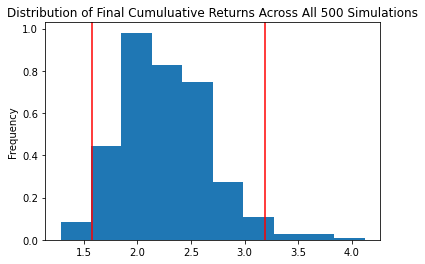

In [55]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

dist_plot_five = MC_even_dist_five.plot_distribution()

In [56]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

even_tbl_five = MC_even_dist_five.summarize_cumulative_return()
# Print summary statistics
# YOUR CODE HERE!

print(even_tbl_five)

count           500.000000
mean              2.266588
std               0.418422
min               1.285417
25%               1.955658
50%               2.226341
75%               2.544182
max               4.120219
95% CI Lower      1.578730
95% CI Upper      3.191174
Name: 1260, dtype: float64


In [57]:
# Set initial investment
# YOUR CODE HERE!

initial_investment_five = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

ci_lower_five = round(even_tbl_five[8]*60000,2)
ci_upper_five = round(even_tbl_five[9]*60000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 5 years will end within in the range of"
      f" ${ci_lower_five} and ${ci_upper_five}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 5 years will end within in the range of $94723.82 and $191470.42


### Ten Years Retirement Option

In [58]:
# Configuring a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

MC_even_dist_ten = MCSimulation(portfolio_data= df_stock_data, weights = [.40,.60], num_simulation = 500, num_trading_days = 252 * 10)
MC_even_dist_ten.portfolio_data.head()

AGG                                       \
                             open      high       low   close   volume   
time                                                                     
2020-12-07 00:00:00-05:00  117.76  117.8262  117.6900  117.75  4689469   
2020-12-08 00:00:00-05:00  117.88  117.9597  117.7500  117.77  3587353   
2020-12-09 00:00:00-05:00  117.73  117.7800  117.5172  117.62  4720359   
2020-12-10 00:00:00-05:00  117.74  117.9300  117.6900  117.88  4694024   
2020-12-11 00:00:00-05:00  118.01  118.0900  117.9500  118.03  5537449   

                                           SPY                              \
                          daily_return    open      high     low     close   
time                                                                         
2020-12-07 00:00:00-05:00          NaN  369.02  369.6200  367.72  369.1200   
2020-12-08 00:00:00-05:00     0.000170  367.72  370.7800  367.67  370.1599   
2020-12-09 00:00:00-05:00    -0.001274  370.88  371.0500  365.95  366.8900   
2020-12-10 00:00:00-05:00     0.002211  365.37  367.8600  364.43  366.7200   
2020-12-11 00:00:00-05:00     0.001272  364.90  366.7402  363.26  366.2800   

                                                  
                             volume daily_return  
time                                              
2020-12-07 00:00:00-05:00  40456544          NaN  
2020-12-08 00:00:00-05:00  32702217     0.002817  
2020-12-09 00:00:00-05:00  60700254    -0.008834  
2020-12-10 00:00:00-05:00  47851654    -0.000463  
2020-12-11 00:00:00-05:00  47917103    -0.001200

In [59]:
# Running a Monte Carlo simulation to forecast 10 years cumulative returns
# YOUR CODE HERE!

MC_even_dist_ten.calc_cumulative_return()

Running Monte Carlo simulation number 0.
Running Monte Carlo simulation number 10.
Running Monte Carlo simulation number 20.
Running Monte Carlo simulation number 30.
Running Monte Carlo simulation number 40.
Running Monte Carlo simulation number 50.
Running Monte Carlo simulation number 60.
Running Monte Carlo simulation number 70.
Running Monte Carlo simulation number 80.
Running Monte Carlo simulation number 90.
Running Monte Carlo simulation number 100.
Running Monte Carlo simulation number 110.
Running Monte Carlo simulation number 120.
Running Monte Carlo simulation number 130.
Running Monte Carlo simulation number 140.
Running Monte Carlo simulation number 150.
Running Monte Carlo simulation number 160.
Running Monte Carlo simulation number 170.
Running Monte Carlo simulation number 180.
Running Monte Carlo simulation number 190.
Running Monte Carlo simulation number 200.
Running Monte Carlo simulation number 210.
Running Monte Carlo simulation number 220.
Running Monte Carlo si

,0,1,2,3,4,5,6,7,8,9,...,490,491,492,493,494,495,496,497,498,499
0,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
1,0.997511,0.991610,1.007106,1.002603,0.990001,0.993390,0.995308,1.003330,0.996716,0.993003,...,1.005479,1.004293,1.006720,0.991084,1.002279,1.001111,1.007193,0.999194,0.998816,0.990304
2,1.004205,0.987741,1.014651,0.999415,0.977105,0.997013,0.994832,1.005799,0.994033,1.004218,...,1.012312,1.009587,1.005610,1.004956,1.011611,1.008449,1.010397,1.005634,1.001300,0.986814
3,1.012299,0.985270,1.014152,0.999396,0.986655,1.000464,0.987829,0.996143,1.003290,1.009992,...,1.025634,1.015878,1.006745,1.006986,1.007952,1.007197,1.006658,1.006556,1.015763,0.990070
4,1.010476,0.979296,1.017997,0.998913,0.987876,0.994140,0.987405,1.008380,1.003472,1.022107,...,1.021695,1.025028,1.007159,1.001298,1.001263,1.009827,1.006597,1.016104,1.017342,0.990569
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2516,4.271647,6.639590,4.281723,4.185352,4.226308,4.626559,5.996160,4.321045,5.988307,6.821868,...,6.509846,4.577804,6.198045,6.702135,6.545292,4.564561,3.092089,5.583121,4.492332,5.335216
2517,4.263023,6.600773,4.309095,4.190369,4.213612,4.637730,6.028708,4.351777,5.994483,6.761302,...,6.570099,4.620925,6.195801,6.729778,6.559869,4.594991,3.097469,5.610380,4.505007,5.393405
2518,4.269217,6.606298,4.316646,4.168021,4.230243,4.639803,6.044831,4.324559,5.982573,6.736903,...,6.577671,4.673301,6.208293,6.758858,6.544892,4.595386,3.090856,5.650825,4.526218,5.414133
2519,4.255872,6.647984,4.352445,4.160551,4.229271,4.623190,6.001208,4.349503,6.045136,6.678397,...,6.586563,4.680391,6.215066,6.769550,6.620781,4.598006,3.096952,5.646339,4.518112,5.435895


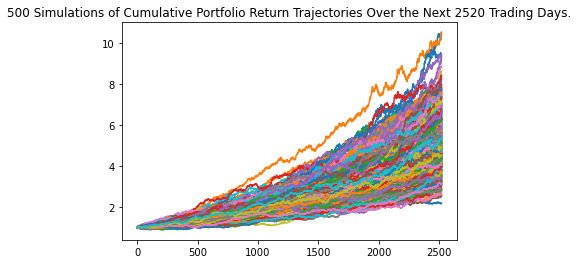

In [61]:
# Plot simulation outcomes
# YOUR CODE HERE!

line_plot_ten = MC_even_dist_ten.plot_simulation()

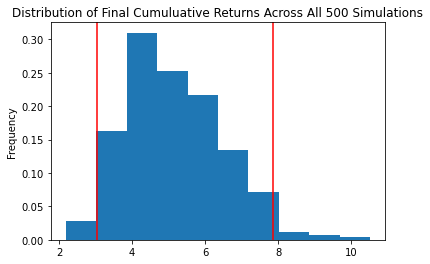

In [62]:
# Plot probability distribution and confidence intervals
# YOUR CODE HERE!

dist_plot_ten = MC_even_dist_ten.plot_distribution()

In [63]:
# Fetch summary statistics from the Monte Carlo simulation results
# YOUR CODE HERE!

even_tbl_ten = MC_even_dist_ten.summarize_cumulative_return()

# Print summary statistics
# YOUR CODE HERE!

print(even_tbl_ten)

count           500.000000
mean              5.169815
std               1.351731
min               2.187093
25%               4.173830
50%               4.964615
75%               6.044254
max              10.512369
95% CI Lower      3.030903
95% CI Upper      7.868192
Name: 2520, dtype: float64


In [64]:
# Set initial investment
# YOUR CODE HERE!

initial_investment_ten = 60000

# Use the lower and upper `95%` confidence intervals to calculate the range of the possible outcomes of our $60,000
# YOUR CODE HERE!

ci_lower_ten = round(even_tbl_ten[8]*60000,2)
ci_upper_ten = round(even_tbl_ten[9]*60000,2)

# Print results
print(f"There is a 95% chance that an initial investment of ${initial_investment} in the portfolio"
      f" over the next 10 years will end within in the range of"
      f" ${ci_lower_ten} and ${ci_upper_ten}")

There is a 95% chance that an initial investment of $30000.0 in the portfolio over the next 10 years will end within in the range of $181854.19 and $472091.52
